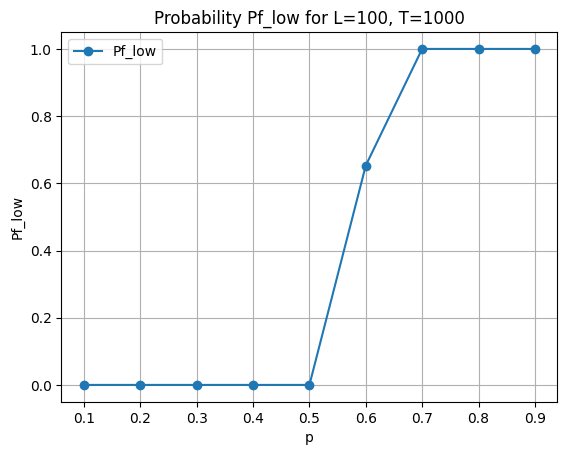

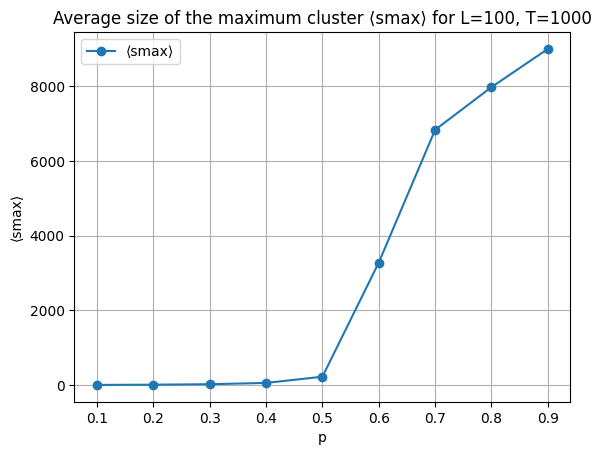

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(L, T):
    results_filename = f'Ave-L{L}T{T}.txt'
    data = np.loadtxt(results_filename)
    p_values = data[:, 0]
    Pf_low_values = data[:, 1]
    smax_values = data[:, 2]

    plt.figure()
    plt.plot(p_values, Pf_low_values, 'o-', label='Pf_low')
    plt.xlabel('p')
    plt.ylabel('Pf_low')
    plt.legend()
    plt.title(f'Probability Pf_low for L={L}, T={T}')
    plt.grid(True)
    plt.savefig(f'Pf_low_L{L}_T{T}.png')

    plt.figure()
    plt.plot(p_values, smax_values, 'o-', label='⟨smax⟩')
    plt.xlabel('p')
    plt.ylabel('⟨smax⟩')
    plt.legend()
    plt.title(f'Average size of the maximum cluster ⟨smax⟩ for L={L}, T={T}')
    plt.grid(True)
    plt.savefig(f'smax_L{L}_T{T}.png')

    plt.show()

plot_results(100, 1000)